In [1]:
from sklearn.preprocessing import LabelBinarizer
from resnet import ResNet
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
NUM_EPOCHS = 100
INIT_LR = 1e-1

def poly_decay(epoch):
    maxEpoch = NUM_EPOCHS
    baseLR = INIT_LR
    power = 1.0
    alpha = baseLR * (1 - epoch / float(maxEpoch)) ** power
    # Return new learning rate    
    return alpha

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

mean = np.mean(X_train, axis=0)
X_train -= mean.astype('uint8')
X_test -= mean.astype('uint8')

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')

In [4]:
#should use mementum or adam to increase the accuracy
opt = SGD(INIT_LR)
callbacks = [LearningRateScheduler(poly_decay)]
model = ResNet.build(32, 32, 3, 10, [9,9,9], [64, 64, 128, 256], reg=0.0005)
model.compile(opt, 'categorical_crossentropy', ['accuracy'])
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=128), validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train)//128, epochs=NUM_EPOCHS, callbacks=callbacks, verbose=1)

Epoch 1/100
390/390 [==============================] - 80s 206ms/step - loss: 4.0034 - acc: 0.3310 - val_loss: 3.7295 - val_acc: 0.4188
Epoch 2/100
390/390 [==============================] - 63s 162ms/step - loss: 3.5222 - acc: 0.4642 - val_loss: 3.3962 - val_acc: 0.4888
Epoch 3/100
390/390 [==============================] - 64s 163ms/step - loss: 3.2312 - acc: 0.5208 - val_loss: 3.1452 - val_acc: 0.5241
Epoch 4/100
390/390 [==============================] - 63s 163ms/step - loss: 2.9917 - acc: 0.5673 - val_loss: 2.9326 - val_acc: 0.5615
Epoch 5/100
390/390 [==============================] - 63s 162ms/step - loss: 2.7780 - acc: 0.6035 - val_loss: 2.7160 - val_acc: 0.6112
Epoch 6/100
390/390 [==============================] - 63s 162ms/step - loss: 2.5934 - acc: 0.6321 - val_loss: 2.5600 - val_acc: 0.6194
Epoch 7/100
390/390 [==============================] - 64s 164ms/step - loss: 2.4280 - acc: 0.6575 - val_loss: 2.4389 - val_acc: 0.6392
Epoch 8/100
390/390 [===========================

Epoch 61/100
390/390 [==============================] - 62s 160ms/step - loss: 0.5155 - acc: 0.9247 - val_loss: 0.7541 - val_acc: 0.8558
Epoch 62/100
390/390 [==============================] - 63s 162ms/step - loss: 0.4999 - acc: 0.9294 - val_loss: 0.7839 - val_acc: 0.8512
Epoch 63/100
390/390 [==============================] - 63s 161ms/step - loss: 0.4985 - acc: 0.9286 - val_loss: 0.7475 - val_acc: 0.8559
Epoch 64/100
390/390 [==============================] - 62s 160ms/step - loss: 0.4848 - acc: 0.9337 - val_loss: 0.7717 - val_acc: 0.8530
Epoch 65/100
390/390 [==============================] - 62s 160ms/step - loss: 0.4787 - acc: 0.9342 - val_loss: 0.7631 - val_acc: 0.8569
Epoch 66/100
390/390 [==============================] - 63s 161ms/step - loss: 0.4722 - acc: 0.9366 - val_loss: 0.8322 - val_acc: 0.8373
Epoch 67/100
390/390 [==============================] - 63s 161ms/step - loss: 0.4665 - acc: 0.9365 - val_loss: 0.7794 - val_acc: 0.8510
Epoch 68/100
390/390 [===================

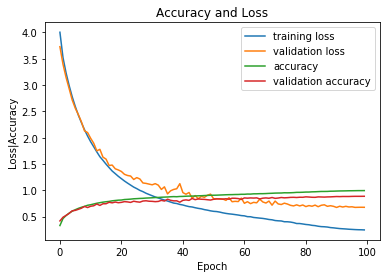

In [5]:
fig = plt.figure()
numOfEpoch=NUM_EPOCHS
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()